# extracted file <br>

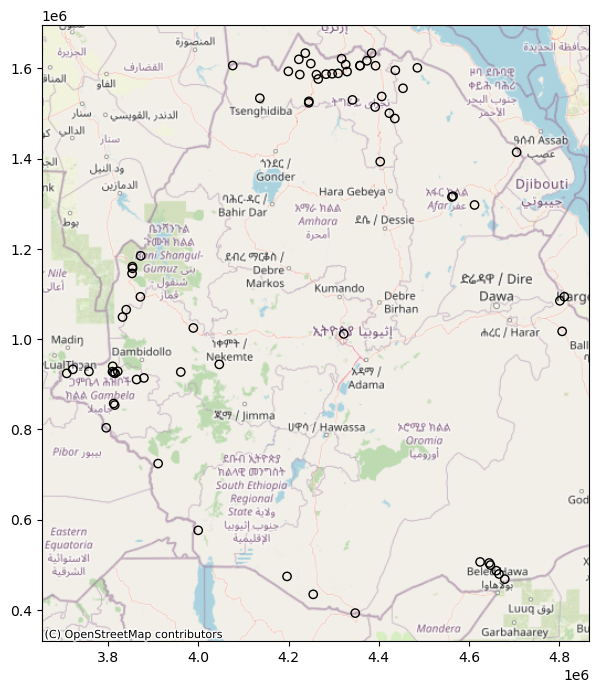

In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = "eth_refugee_camps_unhcr_2019/Eth_refugee_camps_unhcr_2019.shp"
gdf = gpd.read_file(shapefile_path)

# Convert to Web Mercator (EPSG:3857) for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Show plot
plt.show()


In [2]:
gdf

,OBJECTID,FID_1,LocationTy,LocationGr,Name,Region,Zone,Woreda,Latitude,Longitude,Active,geometry
0,1,21,Refugee Camp,Refugee Place,Jewi,Gambela,Agnewak,Gambela Zuria,8.151990,34.703518,1.0,POINT (3863263.747 910681.023)
1,2,30,Refugee Location,Refugee Place,Bonga,Gambela,Agnewak,Gambela Zuria,8.183333,34.850000,0.0,POINT (3879570.384 914205.532)
2,3,22,Refugee Location,Refugee Place,Wanthowa,Gambela,Nuwer,Wantawo,8.272872,33.313000,0.0,POINT (3708468.475 924276.109)
3,4,23,Refugee Center,Refugee Place,Matar,Gambela,Nuwer,Wantawo,8.352633,33.434975,1.0,POINT (3722046.996 933248.553)
4,5,19,Refugee Camp,Refugee Place,Kule,Gambela,Itang,Itang,8.283380,34.250920,1.0,POINT (3812879.624 925457.872)
...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,47,Refugee Camp,Refugee Place,Melkadida,Somali,Liban,Bokolmayo,4.522600,41.722600,1.0,POINT (4644640.504 504139.599)
69,70,50,Refugee Camp,Refugee Place,Kobe,Somali,Liban,Bokolmayo,4.481001,41.746900,1.0,POINT (4647345.611 499494.901)
70,71,6,Refugee Location,Refugee Place,Bure,Afar,Zone 1 (Awsi Rasu),Elidar,12.601494,42.269217,1.0,POINT (4705493.075 1414323.44)
71,72,33,Refugee Location,Refugee Place,Pochalla,Gambela,Agnewak,Dima,7.172300,34.085100,1.0,POINT (3795985.181 803724.346)


In [ ]:
filtered_gdf = gdf[(gdf["Region"] == "Gambela") & (gdf["LocationTy"] == "Refugee Camp")]
filtered_gdf

,OBJECTID,FID_1,LocationTy,LocationGr,Name,Region,Zone,Woreda,Latitude,Longitude,Active,geometry
0,1,21,Refugee Camp,Refugee Place,Jewi,Gambela,Agnewak,Gambela Zuria,8.151990,34.703518,1.0,POINT (3863263.747 910681.023)
4,5,19,Refugee Camp,Refugee Place,Kule,Gambela,Itang,Itang,8.283380,34.250920,1.0,POINT (3812879.624 925457.872)
5,6,20,Refugee Camp,Refugee Place,Tierkidi,Gambela,Itang,Itang,8.275170,34.275980,1.0,POINT (3815669.352 924534.386)
7,8,29,Refugee Camp,Refugee Place,Nguenyiel,Gambela,Itang,Itang,8.313006,34.328425,1.0,POINT (3821507.641 928790.366)
49,50,17,Refugee Camp,Refugee Place,Pugnido,Gambela,Agnewak,Gog,7.648250,34.268080,1.0,POINT (3814789.779 854072.366)
50,51,25,Refugee Camp,Refugee Place,Pugnido 2,Gambela,Agnewak,Gog,7.679180,34.247290,1.0,POINT (3812475.401 857546.217)


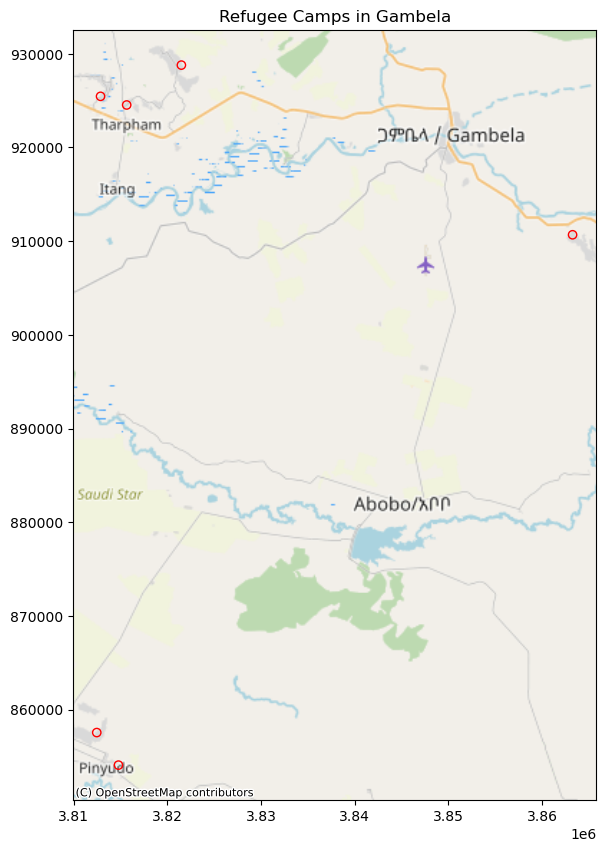

In [7]:
# Convert CRS for basemap compatibility
filtered_gdf = filtered_gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color="red", facecolor="none", linewidth=1)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("Refugee Camps in Gambela")
plt.show()


In [8]:
pugnido_gdf = filtered_gdf[filtered_gdf["Name"].isin(["Pugnido", "Pugnido 2"])]


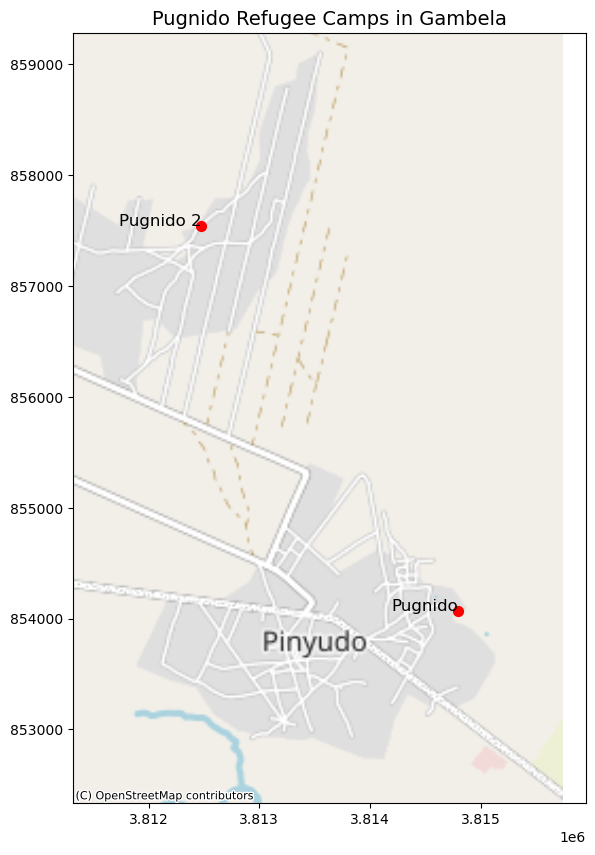

In [21]:
# Convert CRS if necessary (ensure it's in meters for basemap)
pugnido_gdf = pugnido_gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
pugnido_gdf.plot(ax=ax, color="red", marker="o", markersize=50)

# Annotate names
for idx, row in pugnido_gdf.iterrows():
    ax.text(row.geometry.x, row.geometry.y, row["Name"], fontsize=12, ha="right", color="black")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom_adjust=-2)  # Try different values (-1, -2, etc.)

# Get bounding box and add a proportional margin
minx, miny, maxx, maxy = pugnido_gdf.total_bounds
margin_x = (maxx - minx) * 0.5  # 20% extra width
margin_y = (maxy - miny) * 0.5  # 20% extra height

# Apply new limits with margins
ax.set_xlim(minx - margin_x, maxx + margin_x)
ax.set_ylim(miny - margin_y, maxy + margin_y)


# Title
plt.title("Pugnido Refugee Camps in Gambela", fontsize=14)

plt.show()


<span style="background-color: yellow">I don't think those locations are correct, because OSM identifies "Pugnido" where Pugnido 2 above is located...<\span>